In [ ]:
!mv "/content/kaggle (1).json" /content/kaggle.json


mv: cannot stat '/content/kaggle (1).json': No such file or directory


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d adityamahimkar/iqothnccd-lung-cancer-dataset


Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset
License(s): copyright-authors
100% 198M/199M [00:01<00:00, 191MB/s]
100% 199M/199M [00:01<00:00, 175MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -o iqothnccd-lung-cancer-dataset.zip -d /content/drive/MyDrive/lungcancer_dataset

Archive:  iqothnccd-lung-cancer-dataset.zip
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000001_03_01_088.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000017_02_01_016.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000019_01_01_021.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000019_02_01_025.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000019_03_01_025.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000020_01_01_066.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000020_02_01_062.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000020_03_01_134.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000020_03_01_166.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/000020_03_01_212.png  
  inflating: /content/drive/MyDrive/lungcancer_dataset/Test cases/

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = '/content/drive/MyDrive/lungcancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'  # Update to your actual folder

# Set parameters for loading the dataset
img_width, img_height = 150, 150  # Resize all images to 150x150
batch_size = 32

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,       # Normalize pixel values
    shear_range=0.2,        # Apply random shear
    zoom_range=0.2,         # Apply random zoom
    horizontal_flip=True,   # Randomly flip images
    validation_split=0.2)   # Use 20% of data for validation

# Data for test set - only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load the training data (80% of the data)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # Use the 'training' subset

# Load the validation data (20% of the data)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 238s 8s/step - accuracy: 0.7183 - loss: 0.8231 - val_accuracy: 0.4475 - val_loss: 3.5256
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 211s 7s/step - accuracy: 0.9289 - loss: 0.2284 - val_accuracy: 0.4977 - val_loss: 2.1984
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 211s 7s/step - accuracy: 0.9353 - loss: 0.1639 - val_accuracy: 0.6895 - val_loss: 1.3253
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 206s 7s/step - accuracy: 0.9521 - loss: 0.1320 - val_accuracy: 0.6256 - val_loss: 1.2635
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 206s 7s/step - accuracy: 0.9556 - loss: 0.1166 - val_accuracy: 0.6712 - val_loss: 1.0408
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 209s 7s/step - accuracy: 0.9530 - loss: 0.1258 - val_accuracy: 0.7352 - val_loss: 1.1745
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 210s 7s/step - accuracy: 0.9662 - loss: 0.0846 - val_accuracy: 0.8174 - val_loss: 0.7491
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 261s 7s/step - accuracy: 0.9695 - loss: 0.0739 - val_accuracy: 0.7991 - val_loss: 0.

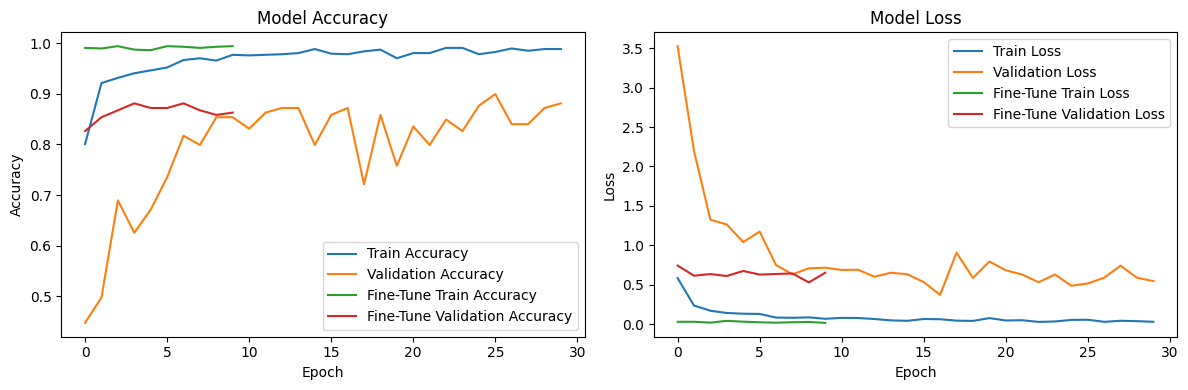

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set the data directory
data_dir = '/content/drive/MyDrive/lungcancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

# Set parameters for loading the dataset
img_width, img_height = 224, 224  # DenseNet121 works with 224x224 images
batch_size = 32

# Data Augmentation with moderate settings
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rotation_range=15,
    validation_split=0.2  # 80% training, 20% validation
)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load DenseNet121 without the top layers and freeze all layers
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
for layer in densenet_base.layers:
    layer.trainable = False

# Build the custom model on top of DenseNet121
model = Sequential([
    densenet_base,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: normal, malignant, benign
])

# Compile the model with a fixed learning rate
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=30,  # Start with 30 epochs
    validation_data=validation_generator
)

# Fine-tuning: Unfreeze the last layers of DenseNet121
for layer in densenet_base.layers[-30:]:  # Unfreeze last 30 layers for fine-tuning
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(
    train_generator,
    epochs=10,  # Fine-tune for 10 additional epochs
    validation_data=validation_generator
)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc * 100:.2f}%')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-Tune Train Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-Tune Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine_tune.history['loss'], label='Fine-Tune Train Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Fine-Tune Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step


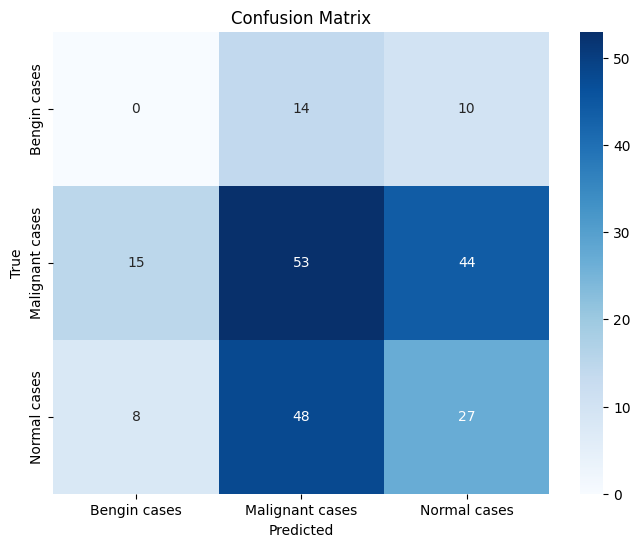

Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       0.00      0.00      0.00        24
Malignant cases       0.46      0.47      0.47       112
   Normal cases       0.33      0.33      0.33        83

       accuracy                           0.37       219
      macro avg       0.26      0.27      0.27       219
   weighted avg       0.36      0.37      0.36       219



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import tensorflow as tf

# After training the model, evaluate it on the validation set

# Get the true labels and predictions from the validation generator
# Reset the generator and make predictions
validation_generator.reset()
Y_pred = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Ensure predictions and true labels match in size
y_pred = y_pred[:len(y_true)]  # Truncate if necessary

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image you want to test
img_path = '/content/img3 ct.jpg'

# Preprocess the image to match the model's input size
img = image.load_img(img_path, target_size=(224, 224))  # Change to 299x299 for InceptionResNetV2
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale pixel values to match training preprocessing

# Predict the class of the image
prediction = model.predict(img_array)

# Output the prediction
class_labels = ['normal', 'malignant', 'benign']
predicted_class = class_labels[np.argmax(prediction)]
print(f'The model predicts: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
The model predicts: benign
